### Import library

In [13]:
import pandas as pd
import re
import unicodedata
from pathlib import Path
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (only runs once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load and preview CSV

We’ll verify the `elon_musk.csv` file exists in the workspace and preview its contents with pandas.

In [14]:

csv_path = Path(r"C:\Users\seakl\Documents\I5-AMS\WR\TP\TP-02\data\elon_musk.csv")
print(f"CSV exists: {csv_path.exists()}  ->  {csv_path.resolve()}")

if csv_path.exists():
    encodings_to_try = ["utf-8", "cp1252", "latin1"]
    last_err = None
    for enc in encodings_to_try:
        try:
            df = pd.read_csv(csv_path, encoding=enc)
            print(f"Loaded with encoding: {enc}")
            break
        except UnicodeDecodeError as e:
            last_err = e
            continue
    else:
        raise last_err

    print("DataFrame shape:", df.shape)
    print("Columns:", list(df.columns))
    display(df.head(5))
else:
    raise FileNotFoundError(f"{csv_path} does not exist.")

CSV exists: True  ->  C:\Users\seakl\Documents\I5-AMS\WR\TP\TP-02\data\elon_musk.csv
Loaded with encoding: cp1252
DataFrame shape: (5, 1)
Columns: ['Text']


,Text
0,https://en.wikipedia.org/wiki/Elon_Musk
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...
2,Musk was born to a Canadian mother and White S...
3,"In 2002, Musk founded SpaceX, an aerospace man..."
4,Musk has been criticized for making unscientif...


### Step 1 — Removing Punctuation (from CSV)

We’ll remove punctuation from the CSV’s `Text` column using Unicode-aware filtering (drops all characters categorized as punctuation). The cleaned text will be stored in a new column `Text_no_punct` and saved to `elon_musk_no_punct.csv`.

In [15]:

def remove_punctuation_safe(x):
    if isinstance(x, str):
        return "".join(ch for ch in x if not unicodedata.category(ch).startswith("P"))
    return x

if "Text" not in df.columns:
    raise KeyError("Expected a 'Text' column in the CSV.")

df["Text_no_punct"] = df["Text"].apply(remove_punctuation_safe)
print("Created column: Text_no_punct (punctuation removed)")

Created column: Text_no_punct (punctuation removed)


In [16]:
df.head(5)

,Text,Text_no_punct
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...


### Step 2 — Removing URLs

In [17]:

def remove_urls(x):
    if isinstance(x, str):
        return re.sub(r'http\S+|www\S+|https\S+', '', x)
    return x

df["Text_no_urls"] = df["Text_no_punct"].apply(remove_urls)
print("Created column: Text_no_urls (URLs removed)")


Created column: Text_no_urls (URLs removed)


In [18]:
df.head(5)

,Text,Text_no_punct,Text_no_urls
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk,
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...,Elon Reeve Musk FRS iln EElon born June 28 197...
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...,In 2002 Musk founded SpaceX an aerospace manuf...
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...


### Step 3 — Remove Stop Words (NLTK)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common stopwords in the dataset:
[('the', 22), ('and', 19), ('in', 17), ('he', 16), ('a', 12), ('of', 11), ('to', 10), ('for', 6), ('was', 5), ('by', 5), ('is', 4), ('with', 4), ('as', 4), ('at', 3), ('an', 3), ('which', 3), ('that', 3), ('but', 2), ('his', 2), ('has', 2)]


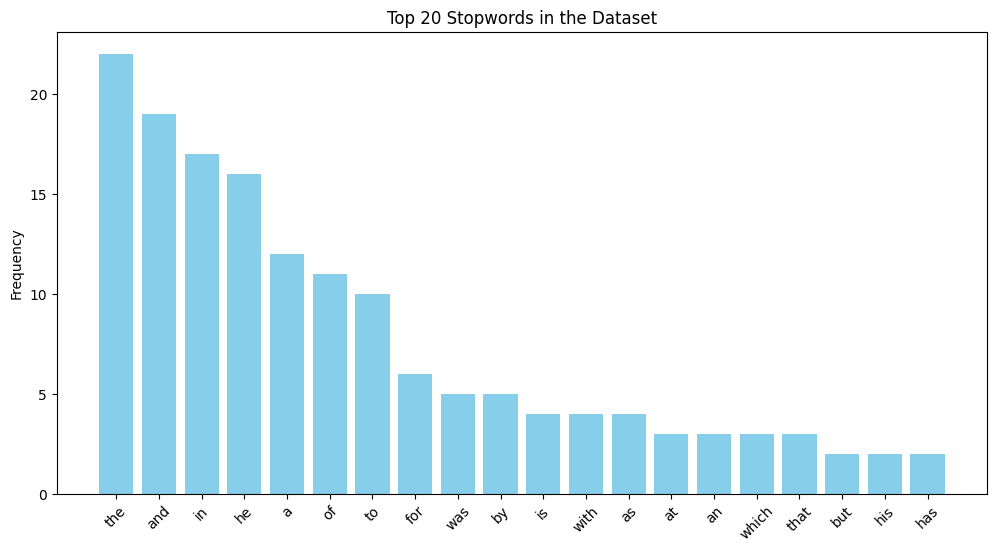

In [30]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# Make sure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Use your DataFrame (df) and the column before stopword removal
text_column = "Text_no_urls" if "Text_no_urls" in df.columns else "Text"

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenize all text in the column and count stopwords
all_tokens = []
for text in df[text_column].dropna():
    tokens = word_tokenize(str(text).lower())
    all_tokens.extend(tokens)

# Filter only stopwords
stopword_tokens = [word for word in all_tokens if word in stop_words]

# Count frequency of each stopword
stopword_counts = Counter(stopword_tokens)

# Show most common stopwords
print("Most common stopwords in the dataset:")
print(stopword_counts.most_common(20))  # top 20

# Plot the top 20 stopwords
top_n = 20
top_stopwords = stopword_counts.most_common(top_n)
words, counts = zip(*top_stopwords)

plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.title(f"Top {top_n} Stopwords in the Dataset")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [19]:

stop_words = set(stopwords.words('english'))

def remove_stopwords_nltk(x):
    if isinstance(x, str):
        # Lowercase and tokenize
        tokens = word_tokenize(x.lower())
        # Keep only alphabetic tokens that are not stopwords
        filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return " ".join(filtered_tokens)
    return x

# Use an available cleaned-text column (fallback sequence)
for col in ("Text_clean", "Text_no_urls", "Text_no_punct", "Text"):
    if col in df.columns:
        src_col = col
        break
else:
    raise KeyError("None of expected text columns found: 'Text_clean', 'Text_no_urls', 'Text_no_punct', or 'Text'")

df["Text_no_stopwords"] = df[src_col].apply(remove_stopwords_nltk)
print(f"Removed English stopwords using NLTK (source column: {src_col}).")

Removed English stopwords using NLTK (source column: Text_no_urls).


In [20]:
df.head(5)

,Text,Text_no_punct,Text_no_urls,Text_no_stopwords
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk,,
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...,Elon Reeve Musk FRS iln EElon born June 28 197...,elon reeve musk frs iln eelon born june busine...
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,musk born canadian mother white south african ...
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...,In 2002 Musk founded SpaceX an aerospace manuf...,musk founded spacex aerospace manufacturer spa...
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,musk criticized making unscientific controvers...


### Step 4 — Lowercasing

In [21]:
# 
def to_lowercase(x):
    if isinstance(x, str):
        return x.lower()
    return x

df["Text_lower"] = df["Text_no_urls"].apply(to_lowercase)
print("Created column: Text_lower (all text converted to lowercase)")


Created column: Text_lower (all text converted to lowercase)


In [22]:
df.head()

,Text,Text_no_punct,Text_no_urls,Text_no_stopwords,Text_lower
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk,,,
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...,Elon Reeve Musk FRS iln EElon born June 28 197...,elon reeve musk frs iln eelon born june busine...,elon reeve musk frs iln eelon born june 28 197...
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,musk born canadian mother white south african ...,musk was born to a canadian mother and white s...
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...,In 2002 Musk founded SpaceX an aerospace manuf...,musk founded spacex aerospace manufacturer spa...,in 2002 musk founded spacex an aerospace manuf...
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,musk criticized making unscientific controvers...,musk has been criticized for making unscientif...


In [23]:
# 5. Tokenization
from nltk.tokenize import word_tokenize

def tokenize_text(x):
    if isinstance(x, str):
        return word_tokenize(x)  # returns a list of tokens
    return []

df["Text_tokens"] = df["Text_lower"].apply(tokenize_text)
print("Created column: Text_tokens (text tokenized into word tokens)")


Created column: Text_tokens (text tokenized into word tokens)


In [24]:
df.head(5)

,Text,Text_no_punct,Text_no_urls,Text_no_stopwords,Text_lower,Text_tokens
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk,,,,[]
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...,Elon Reeve Musk FRS iln EElon born June 28 197...,elon reeve musk frs iln eelon born june busine...,elon reeve musk frs iln eelon born june 28 197...,"[elon, reeve, musk, frs, iln, eelon, born, jun..."
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,musk born canadian mother white south african ...,musk was born to a canadian mother and white s...,"[musk, was, born, to, a, canadian, mother, and..."
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...,In 2002 Musk founded SpaceX an aerospace manuf...,musk founded spacex aerospace manufacturer spa...,in 2002 musk founded spacex an aerospace manuf...,"[in, 2002, musk, founded, spacex, an, aerospac..."
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,musk criticized making unscientific controvers...,musk has been criticized for making unscientif...,"[musk, has, been, criticized, for, making, uns..."


In [25]:
# 6. Stemming (Reduction to Root Word)
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")

def stem_tokens(tokens):
    if isinstance(tokens, list):
        return [stemmer.stem(word) for word in tokens]
    return []

df["Text_stemmed"] = df["Text_tokens"].apply(stem_tokens)
print("Created column: Text_stemmed (words reduced to their root form)")

df.head(5)

Created column: Text_stemmed (words reduced to their root form)


,Text,Text_no_punct,Text_no_urls,Text_no_stopwords,Text_lower,Text_tokens,Text_stemmed
0,https://en.wikipedia.org/wiki/Elon_Musk,httpsenwikipediaorgwikiElonMusk,,,,[],[]
1,Elon Reeve Musk FRS (/?i?l?n/ EE-lon; born Jun...,Elon Reeve Musk FRS iln EElon born June 28 197...,Elon Reeve Musk FRS iln EElon born June 28 197...,elon reeve musk frs iln eelon born june busine...,elon reeve musk frs iln eelon born june 28 197...,"[elon, reeve, musk, frs, iln, eelon, born, jun...","[elon, reev, musk, frs, iln, eelon, born, june..."
2,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,Musk was born to a Canadian mother and White S...,musk born canadian mother white south african ...,musk was born to a canadian mother and white s...,"[musk, was, born, to, a, canadian, mother, and...","[musk, was, born, to, a, canadian, mother, and..."
3,"In 2002, Musk founded SpaceX, an aerospace man...",In 2002 Musk founded SpaceX an aerospace manuf...,In 2002 Musk founded SpaceX an aerospace manuf...,musk founded spacex aerospace manufacturer spa...,in 2002 musk founded spacex an aerospace manuf...,"[in, 2002, musk, founded, spacex, an, aerospac...","[in, 2002, musk, found, spacex, an, aerospac, ..."
4,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,Musk has been criticized for making unscientif...,musk criticized making unscientific controvers...,musk has been criticized for making unscientif...,"[musk, has, been, criticized, for, making, uns...","[musk, has, been, critic, for, make, unscienti..."


In [26]:
import nltk

# Download the necessary NLTK data packages
nltk.download('wordnet')
nltk.download('omw-1.4')

# Try the newer tagger name first, fallback to old one if not found
try:
    nltk.download('averaged_perceptron_tagger_eng')
except:
    nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [27]:
# 7. Lemmatization (Reduction to Dictionary Form)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

# Download required NLTK data (only first time)
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

# Helper function: Map POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# Lemmatization function
def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        pos_tags = pos_tag(tokens)
        return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return []

df["Text_lemmatized"] = df["Text_tokens"].apply(lemmatize_tokens)
print("Created column: Text_lemmatized (words reduced to their dictionary form)")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\seakl\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Created column: Text_lemmatized (words reduced to their dictionary form)


In [28]:
from tabulate import tabulate

In [29]:
# Do not assign the result of print() to df — print() returns None.
# Simply print the tabulated DataFrame so df remains the DataFrame object.
print(tabulate(df.head(5), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════